In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5

In [2]:
percentage_weights = []
for levl in range(0, 27):
    file_path = '../open_lth_data/lottery_2f4be23b7e4c30fb5fbf086d41cfacb7/replicate_1/level_'+str(levl)+'/main/sparsity_report.json'
    with open(file_path) as fp:
        data = json.load(fp)
    percentage_weights.append(round(100 * data['unpruned'] / data['total'], 2))

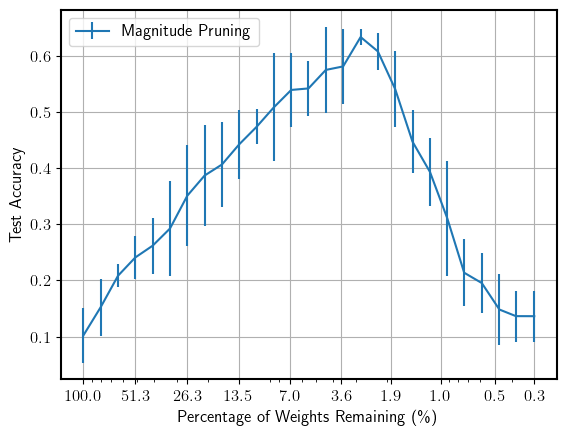

In [3]:
means = np.array([])
stds = np.array([])
x = np.arange(0,27,1)
x_labels = [100, 51.3, 26.3, 13.5, 7.0, 3.6, 1.9, 1.0, 0.5, 0.3]

for levl in range(0, 27):
    vals = []
    for repl in range(1,4):
        my_data = pd.read_csv('../open_lth_data/lottery_2f4be23b7e4c30fb5fbf086d41cfacb7/replicate_' + str(repl) + '/level_'+str(levl)+'/main/logger', header=None)
        my_data.columns = ['a', 'b', 'c']
        val = my_data[my_data.a=='test_accuracy'].iloc[0].c
        vals.append(val)

    means = np.append(means,np.mean(vals))
    stds = np.append(stds, np.std(vals))

means_mag = means
stds_mag = stds
x_mag = x
fig, ax = plt.subplots()
plt.errorbar(percentage_weights, means, stds, label='Magnitude Pruning')
ax.invert_xaxis()
ax.set_xscale("log")
ax.set_xticks(x_labels)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Percentage of Weights Remaining (\%)")
ax.set_ylabel("Test Accuracy")
ax.grid()
ax.legend()
plt.show()

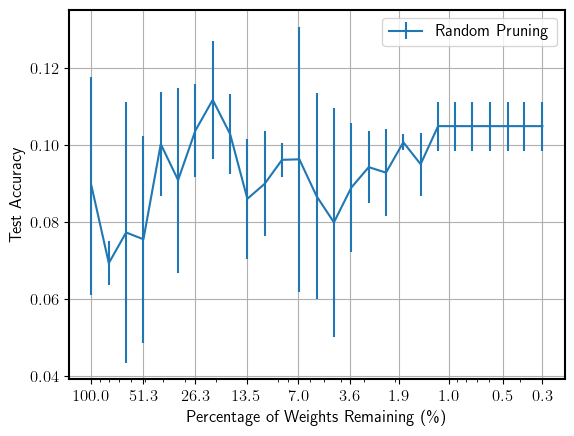

In [4]:
means = np.array([])
stds = np.array([])
x = np.arange(0,27,1)

for levl in range(0, 27):
    vals = []
    for repl in range(1,4):
        my_data = pd.read_csv('../open_lth_data/lottery_3792c36a54808af5d03e5d556b4ab357/replicate_' + str(repl) + '/level_'+str(levl)+'/main/logger', header=None)
        my_data.columns = ['a', 'b', 'c']
        val = my_data[my_data.a=='test_accuracy'].iloc[0].c
        vals.append(val)

    means = np.append(means,np.mean(vals))
    stds = np.append(stds, np.std(vals))

means_rand = means
stds_rand = stds
x_rand = x
fig, ax = plt.subplots()
ax.errorbar(percentage_weights, means, stds, label='Random Pruning')
ax.invert_xaxis()
ax.set_xscale("log")
ax.set_xticks(x_labels)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Percentage of Weights Remaining (\%)")
ax.set_ylabel("Test Accuracy")
ax.grid()
ax.legend()
plt.show()

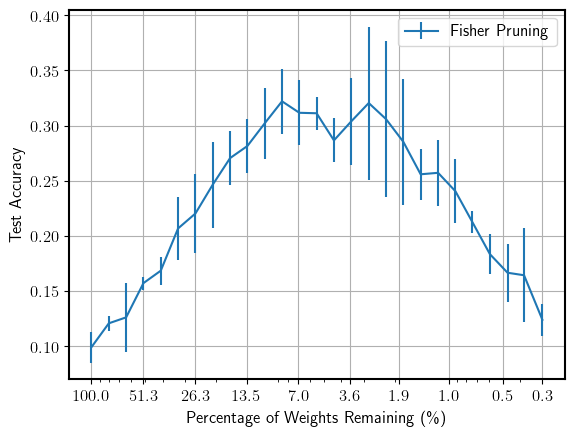

In [5]:
means = np.array([])
stds = np.array([])
x = np.arange(0,27,1)

for levl in range(0, 27):
    vals = []
    for repl in range(1,4):
        my_data = pd.read_csv('../open_lth_data/lottery_a36edb229aed327b8e25e0685c350491/replicate_' + str(repl) + '/level_'+str(levl)+'/main/logger', header=None)
        my_data.columns = ['a', 'b', 'c']
        val = my_data[my_data.a=='test_accuracy'].iloc[0].c
        vals.append(val)

    means = np.append(means,np.mean(vals))
    stds = np.append(stds, np.std(vals))

means_fish = means
stds_fish = stds
x_fish = x
fig, ax = plt.subplots()
plt.errorbar(percentage_weights, means, stds, label='Fisher Pruning')
ax.invert_xaxis()
ax.set_xscale("log")
ax.set_xticks(x_labels)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Percentage of Weights Remaining (\%)")
ax.set_ylabel("Test Accuracy")
ax.grid()
ax.legend()
plt.show()

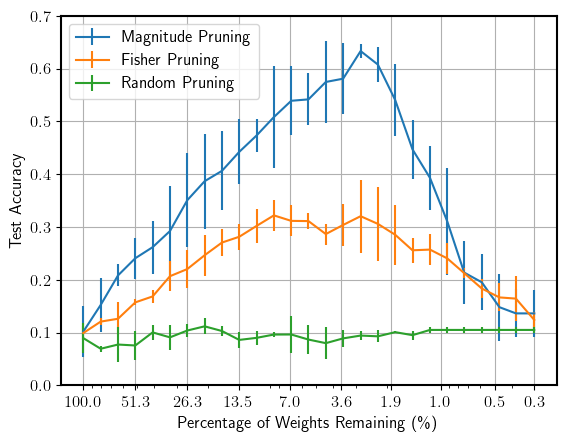

In [6]:
fig, ax = plt.subplots()
ax.errorbar(percentage_weights, means_mag, stds_mag, label='Magnitude Pruning')
ax.errorbar(percentage_weights, means_fish, stds_fish, label='Fisher Pruning')
ax.errorbar(percentage_weights, means_rand, stds_rand, label='Random Pruning')
ax.set_ylim([0., 0.7])
ax.invert_xaxis()
ax.set_xscale("log")
ax.set_xticks(x_labels)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Percentage of Weights Remaining (\%)")
ax.set_ylabel("Test Accuracy")
ax.grid()
ax.legend()
plt.show()

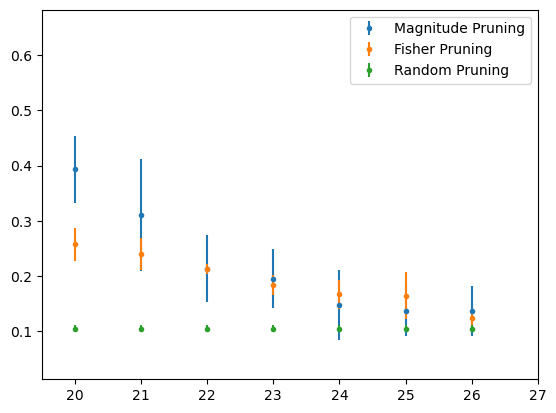

In [49]:
plt.errorbar(x_mag, means_mag, stds_mag, linestyle='None', marker='.', label='Magnitude Pruning')
plt.errorbar(x_fish, means_fish, stds_fish, linestyle='None', marker='.', label='Fisher Pruning')
plt.errorbar(x_rand, means_rand, stds_rand, linestyle='None', marker='.', label='Random Pruning')
plt.xlim([19.5, 27])

plt.legend()
plt.show()